#### test machine learning performance with DA: onehot+hhblits

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# prepare datasets
train_pkl1 = pd.read_pickle('../../../datasets/final/train_stab_da(ori)_onehot_hhblits.pkl')
train_pkl2 = pd.read_pickle('../../../datasets/final/train_stab_da(ori+rev)_onehot_hhblits.pkl')
train_pkl3 = pd.read_pickle('../../../datasets/final/train_stab_da(ori+rev+non)_onehot_hhblits.pkl')
test_pkl1 = pd.read_pickle('../../../datasets/final/test_stab_da(non)_onehot_hhblits.pkl')
test_pkl2 = pd.read_pickle('../../../datasets/final/test_stab_da(ori+rev)_onehot_hhblits.pkl')
test_pkl3 = pd.read_pickle('../../../datasets/final/test_stab_da(rev)_onehot_hhblits.pkl')
test_pkl4 = pd.read_pickle('../../../datasets/final/test_stab_mcsm(all)_onehot_hhblits.pkl')
test_pkl5 = pd.read_pickle('../../../datasets/final/test_stab_mcsm(ori)_onehot_hhblits.pkl')
test_pkl6 = pd.read_pickle('../../../datasets/final/test_stab_mcsm(rev)_onehot_hhblits.pkl')
train_pkl1.head()

,seq_before_onehot,seq_after_onehot,seq_before_hhblits,seq_after_hhblits,label,seq_len
0,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...",-0.1,227
1,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...",-1.8,227
2,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...",-0.6,227
3,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...",-2.0,227
4,"[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...","[[99999.0, 99999.0, 99999.0, 99999.0, 99999.0,...",-2.1,227


In [3]:
from sklearn.utils import shuffle

shuffled = train_pkl1
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_train1 = np.array(sample_list)
Y_train1 = shuffled['label'].values
print(X_train1.shape)
print(Y_train1.shape)

shuffled = train_pkl2
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_train2 = np.array(sample_list)
Y_train2 = shuffled['label'].values
print(X_train2.shape)
print(Y_train2.shape)

shuffled = train_pkl3
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_train3 = np.array(sample_list)
Y_train3 = shuffled['label'].values
print(X_train3.shape)
print(Y_train3.shape)

#########################################################################

shuffled = test_pkl1
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_test1 = np.array(sample_list)
Y_test1 = shuffled['label'].values
print(X_test1.shape)
print(Y_test1.shape)

shuffled = test_pkl2
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_test2 = np.array(sample_list)
Y_test2 = shuffled['label'].values

shuffled = test_pkl3
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_test3 = np.array(sample_list)
Y_test3 = shuffled['label'].values

shuffled = test_pkl4
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_test4 = np.array(sample_list)
Y_test4 = shuffled['label'].values

shuffled = test_pkl5
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_test5 = np.array(sample_list)
Y_test5 = shuffled['label'].values

shuffled = test_pkl6
sample_list = []
for i in range(shuffled.shape[0]):
    feature_list = []
    feature_list += shuffled['seq_before_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_after_onehot'][i].flatten().tolist()
    feature_list += shuffled['seq_before_hhblits'][i].flatten().tolist()
    feature_list += shuffled['seq_after_hhblits'][i].flatten().tolist()
    sample_list.append(feature_list)
X_test6 = np.array(sample_list)
Y_test6 = shuffled['label'].values


(187, 51200)
(187,)
(374, 51200)
(374,)
(748, 51200)
(748,)
(72, 51200)
(72,)


In [4]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
sns.set(color_codes=True)

other_params = {'learning_rate': 0.01, 'n_estimators': 450, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}


cv_params = {'n_estimators': [100, 1000, 5000, 10000, 50000]} # 
#cv_params = {'n_estimators': [400, 450, 500, 550]} # 450
#cv_params = {'learning_rate': [0.0001,0.001,0.01, 0.05, 0.1, 0.15, 0.3]} # 0.01
#cv_params = {'max_depth': [5, 10, 20, 50]}

clf = XGBRegressor(**other_params)
from sklearn.model_selection import GridSearchCV
optimized_GBM = GridSearchCV(estimator=clf, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(X_train1, Y_train1)
print(optimized_GBM.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'n_estimators': 50000}


c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


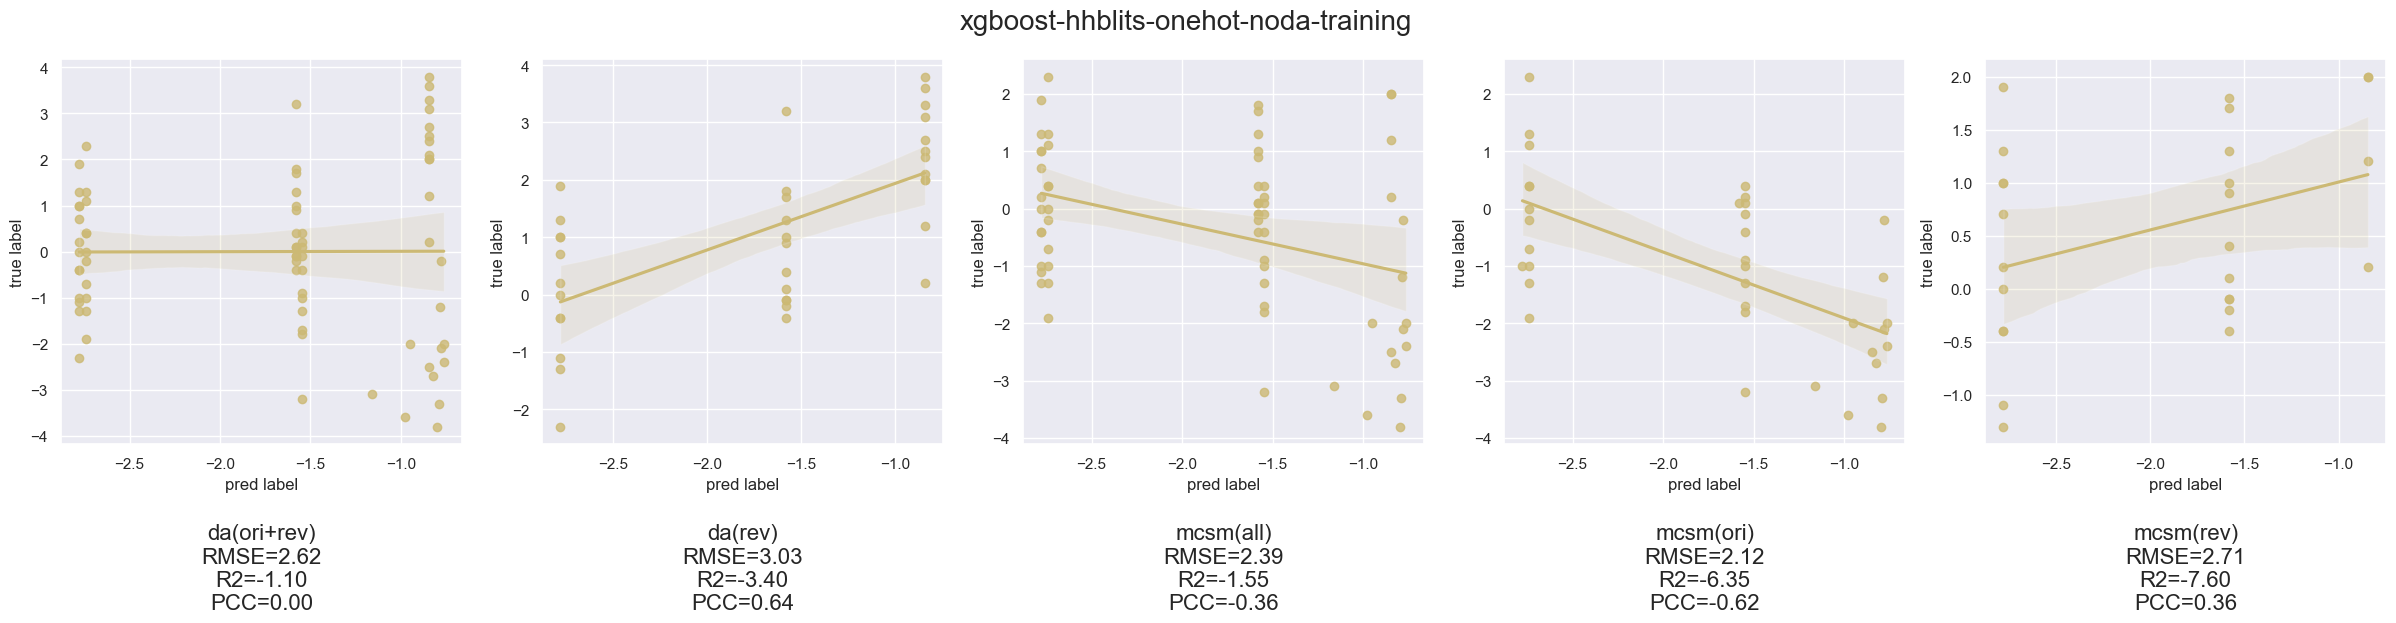

In [6]:
clf = XGBRegressor(n_estimators=50000,learning_rate=0.001)
clf.fit(X_train1, Y_train1)
Y_pred1 = clf.predict(X_test1)
Y_pred2 = clf.predict(X_test2)
Y_pred3 = clf.predict(X_test3)
Y_pred4 = clf.predict(X_test4)
Y_pred5 = clf.predict(X_test5)
Y_pred6 = clf.predict(X_test6)

rmse_list = []
r2_list = []
pcc_list = []

rmse_list.append(np.sqrt(mean_squared_error(Y_test1, Y_pred1)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
rmse_list.append(np.sqrt(mean_squared_error(Y_pred5, Y_test5)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

r2_list.append(r2_score(Y_test1, Y_pred1))
r2_list.append(r2_score(Y_test2, Y_pred2))
r2_list.append(r2_score(Y_test3, Y_pred3))
r2_list.append(r2_score(Y_test4, Y_pred4))
r2_list.append(r2_score(Y_pred5, Y_test5))
r2_list.append(r2_score(Y_test6, Y_pred6))

pcc_list.append(pearsonr(Y_test1, Y_pred1)[0])
pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
pcc_list.append(pearsonr(Y_pred5, Y_test5)[0])
pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

fig = plt.figure(figsize=(30,5))
'''
plt.subplot(1, 6, 1)
plt.title('da(non)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred1,y=Y_test1,color='y')
'''
plt.subplot(1, 5, 1)
plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred2,y=Y_test2,color='y')

plt.subplot(1, 5, 2)
plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred3,y=Y_test3,color='y')

plt.subplot(1, 5, 3)
plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred4,y=Y_test4,color='y')

plt.subplot(1, 5, 4)
plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred5,y=Y_test5,color='y')

plt.subplot(1, 5, 5)
plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[5],r2_list[5],pcc_list[5]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred6,y=Y_test6,color='y')

plt.suptitle('xgboost-hhblits-onehot-noda-training', fontsize=20)
plt.savefig('images/xgboost-hhblits-onehot-noda-training.png',dpi=300, bbox_inches = 'tight')
plt.show()

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
sns.set(color_codes=True)

other_params = {'learning_rate': 0.01, 'n_estimators': 450, 'max_depth': 5, 'min_child_weight': 1, 'seed': 0,
                    'subsample': 0.8, 'colsample_bytree': 0.8, 'gamma': 0, 'reg_alpha': 0, 'reg_lambda': 1}


cv_params = {'n_estimators': [100, 1000, 5000, 10000, 50000]} # 
#cv_params = {'n_estimators': [400, 450, 500, 550]} # 450
#cv_params = {'learning_rate': [0.0001,0.001,0.01, 0.05, 0.1, 0.15, 0.3]} # 0.01
#cv_params = {'max_depth': [5, 10, 20, 50]}

clf = XGBRegressor(**other_params)
from sklearn.model_selection import GridSearchCV
optimized_GBM = GridSearchCV(estimator=clf, param_grid=cv_params, scoring='r2', cv=5, verbose=1, n_jobs=-1)
optimized_GBM.fit(X_train1, Y_train1)
print(optimized_GBM.best_params_)

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


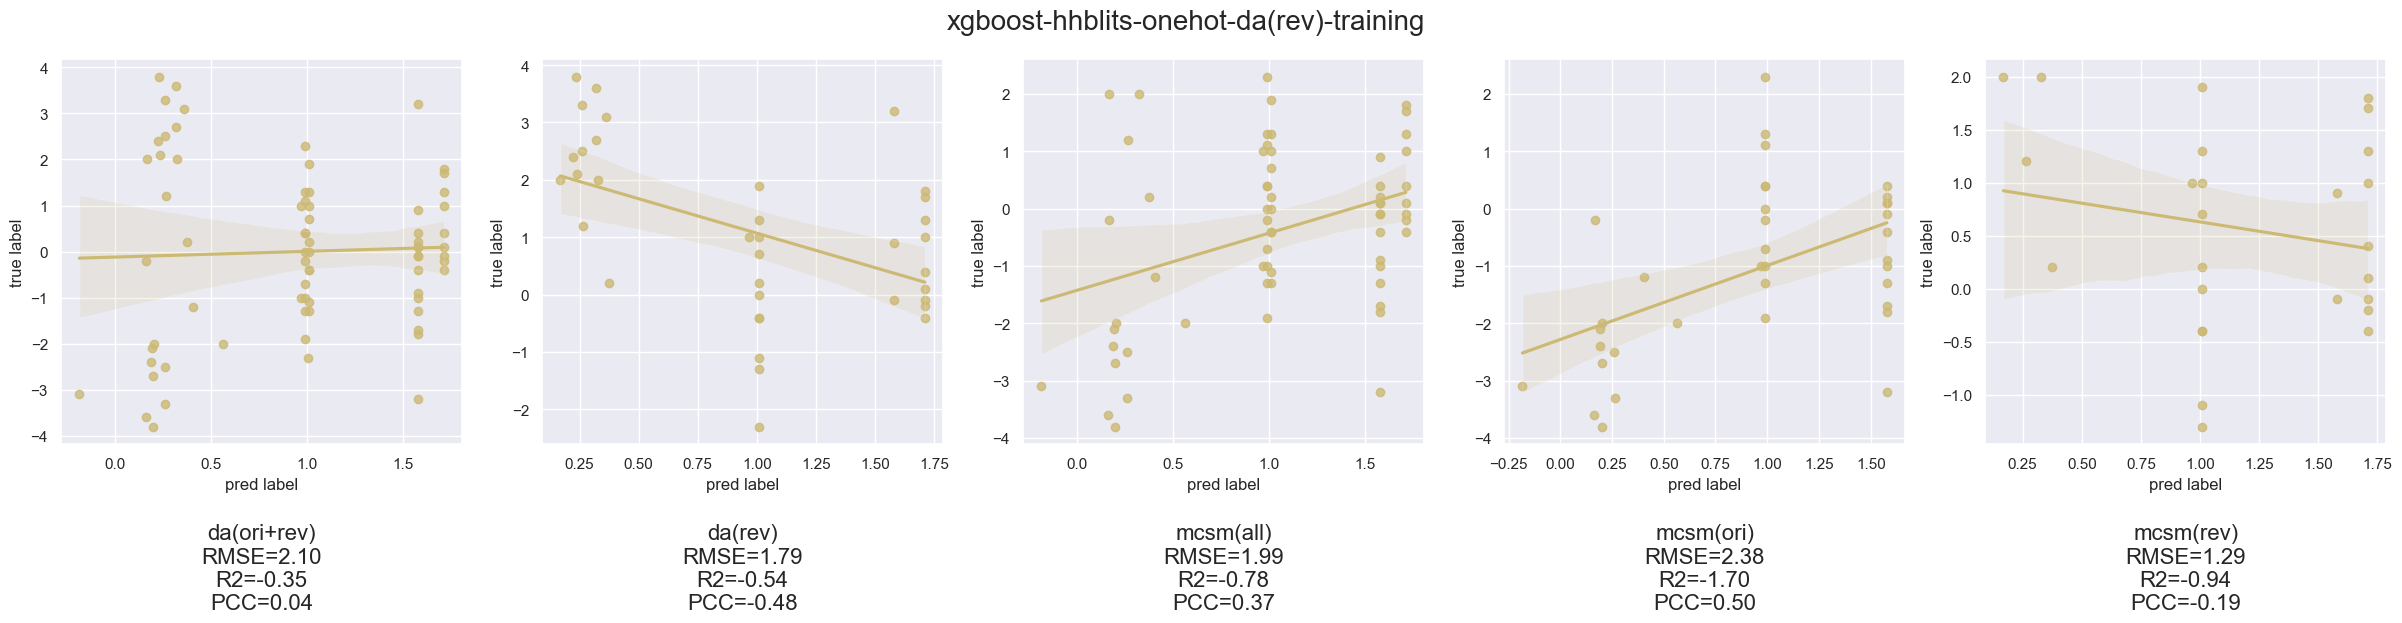

In [5]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
sns.set(color_codes=True)

clf = XGBRegressor(n_estimators=50000,learning_rate=0.001)
clf.fit(X_train2, Y_train2)
Y_pred1 = clf.predict(X_test1)
Y_pred2 = clf.predict(X_test2)
Y_pred3 = clf.predict(X_test3)
Y_pred4 = clf.predict(X_test4)
Y_pred5 = clf.predict(X_test5)
Y_pred6 = clf.predict(X_test6)

rmse_list = []
r2_list = []
pcc_list = []

rmse_list.append(np.sqrt(mean_squared_error(Y_test1, Y_pred1)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test5, Y_pred5)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

r2_list.append(r2_score(Y_test1, Y_pred1))
r2_list.append(r2_score(Y_test2, Y_pred2))
r2_list.append(r2_score(Y_test3, Y_pred3))
r2_list.append(r2_score(Y_test4, Y_pred4))
r2_list.append(r2_score(Y_test5, Y_pred5))
r2_list.append(r2_score(Y_test6, Y_pred6))

pcc_list.append(pearsonr(Y_test1, Y_pred1)[0])
pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
pcc_list.append(pearsonr(Y_test5, Y_pred5)[0])
pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

fig = plt.figure(figsize=(30,5))
'''
plt.subplot(1, 6, 1)
plt.title('da(non)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred1,y=Y_test1,color='y')
'''
plt.subplot(1, 5, 1)
plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred2,y=Y_test2,color='y')

plt.subplot(1, 5, 2)
plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred3,y=Y_test3,color='y')

plt.subplot(1, 5, 3)
plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred4,y=Y_test4,color='y')

plt.subplot(1, 5, 4)
plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred5,y=Y_test5,color='y')

plt.subplot(1, 5, 5)
plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[5],r2_list[5],pcc_list[5]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred6,y=Y_test6,color='y')

plt.suptitle('xgboost-hhblits-onehot-da(rev)-training', fontsize=20)
plt.savefig('images/xgboost-hhblits-onehot-da(rev)-training.png',dpi=300, bbox_inches = 'tight')
plt.show()

c:\Users\Administrator\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:4068: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())


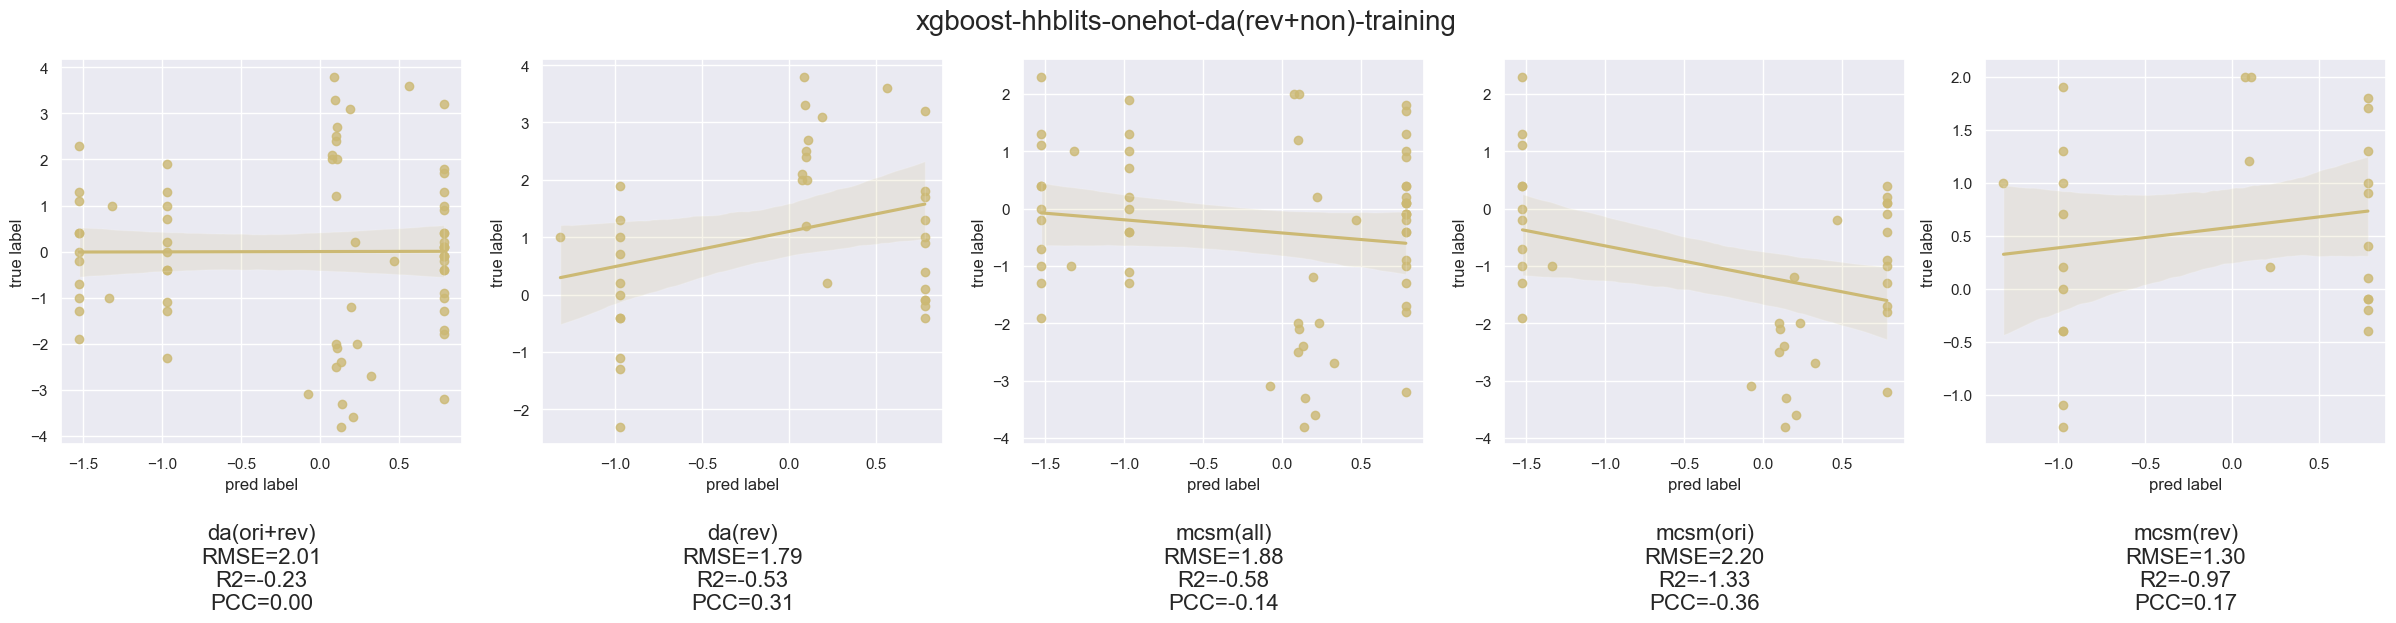

In [6]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score, KFold
sns.set(color_codes=True)

clf = XGBRegressor(n_estimators=50000,learning_rate=0.001)
clf.fit(X_train3, Y_train3)
Y_pred1 = clf.predict(X_test1)
Y_pred2 = clf.predict(X_test2)
Y_pred3 = clf.predict(X_test3)
Y_pred4 = clf.predict(X_test4)
Y_pred5 = clf.predict(X_test5)
Y_pred6 = clf.predict(X_test6)

rmse_list = []
r2_list = []
pcc_list = []

rmse_list.append(np.sqrt(mean_squared_error(Y_test1, Y_pred1)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test2, Y_pred2)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test3, Y_pred3)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test4, Y_pred4)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test5, Y_pred5)))
rmse_list.append(np.sqrt(mean_squared_error(Y_test6, Y_pred6)))

r2_list.append(r2_score(Y_test1, Y_pred1))
r2_list.append(r2_score(Y_test2, Y_pred2))
r2_list.append(r2_score(Y_test3, Y_pred3))
r2_list.append(r2_score(Y_test4, Y_pred4))
r2_list.append(r2_score(Y_test5, Y_pred5))
r2_list.append(r2_score(Y_test6, Y_pred6))

pcc_list.append(pearsonr(Y_test1, Y_pred1)[0])
pcc_list.append(pearsonr(Y_test2, Y_pred2)[0])
pcc_list.append(pearsonr(Y_test3, Y_pred3)[0])
pcc_list.append(pearsonr(Y_test4, Y_pred4)[0])
pcc_list.append(pearsonr(Y_test5, Y_pred5)[0])
pcc_list.append(pearsonr(Y_test6, Y_pred6)[0])

fig = plt.figure(figsize=(30,5))
'''
plt.subplot(1, 6, 1)
plt.title('da(non)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[0],r2_list[0],pcc_list[0]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred1,y=Y_test1,color='y')
'''
plt.subplot(1, 5, 1)
plt.title('da(ori+rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[1],r2_list[1],pcc_list[1]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred2,y=Y_test2,color='y')

plt.subplot(1, 5, 2)
plt.title('da(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[2],r2_list[2],pcc_list[2]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred3,y=Y_test3,color='y')

plt.subplot(1, 5, 3)
plt.title('mcsm(all)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[3],r2_list[3],pcc_list[3]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred4,y=Y_test4,color='y')

plt.subplot(1, 5, 4)
plt.title('mcsm(ori)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[4],r2_list[4],pcc_list[4]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred5,y=Y_test5,color='y')

plt.subplot(1, 5, 5)
plt.title('mcsm(rev)\nRMSE=%.2f\nR2=%.2f\nPCC=%.2f'%(rmse_list[5],r2_list[5],pcc_list[5]), fontsize=16,y=-0.45)
plt.ylabel("true label")
plt.xlabel("pred label")
sns.regplot(x=Y_pred6,y=Y_test6,color='y')

plt.suptitle('xgboost-hhblits-onehot-da(rev+non)-training', fontsize=20)
plt.savefig('images/xgboost-hhblits-onehot-da(rev+non)-training.png',dpi=300, bbox_inches = 'tight')
plt.show()